In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
import sys
pd.set_option('display.width', 2000)
sys.path.insert(1, 'D:/Users\Jonas/nuclei')
from utils import readImage
import numpy as np

In [3]:

nucleus_df = pd.read_csv('csv/nuclei.csv')

regions_df = nucleus_df[(nucleus_df['Location'] != 'Undefined')]
print(regions_df)

       Condition                                          ImageName  Label    Area                                           Centroid         CellType Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  gfpPositive
0         Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...      1  1311.0  (3.887109077040427, 2341.739893211289, 2699.13...  neunPositiveLow       DG     30.109077      0.247902     42.160183     52.469108          NaN
1         Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...      2  1537.0  (2.652569941444372, 1555.5953155497723, 2999.8...        Undefined       DG     19.577749      0.527001     67.763175     58.642811          NaN
4         Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...      5  1634.0  (2.8225214198286412, 1266.3500611995105, 2527....        Undefined       DG     14.410037      0.391677     47.391677     92.392901          NaN
5         Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...      6  1536.0  

                                                                                                      ImageName Condition Location  Ch1Intensity
0                   HI 1 Contralateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica 2.lsm    Contra      CA1     51.266127
1                   HI 1 Contralateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica 2.lsm    Contra      CA3     50.034674
2                   HI 1 Contralateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica 2.lsm    Contra       DG     31.403086
3                      HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica1.lsm      Ipsi      CA1     22.565875
4                      HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica1.lsm      Ipsi      CA3     17.924776
5                      HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNpink CD86red 40x 4x4 technical replica1.lsm      Ipsi       DG

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\3276103889.py:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=fluo_df, x='Location', y='Ch1Intensity', hue='Condition', hue_order=['Sham', 'Contra', 'Ipsi'], dodge=True, palette=palette, alpha=0.7)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


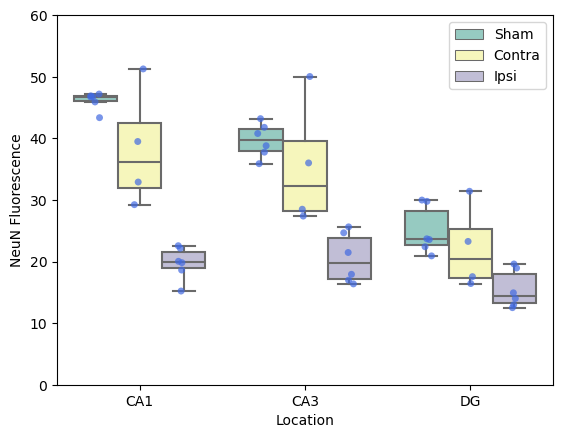

In [27]:
fluo_df = regions_df.groupby(['ImageName', 'Condition', 'Location'])['Ch1Intensity'].mean().reset_index()
pd.set_option('display.max_colwidth', None)

print(fluo_df)
palette = sns.color_palette(['royalblue'], 2)
boxplot = sns.boxplot(data=fluo_df, x='Location', y='Ch1Intensity', hue='Condition', showfliers = False, hue_order=['Sham', 'Contra', 'Ipsi'], palette='Set3')
sns.stripplot(data=fluo_df, x='Location', y='Ch1Intensity', hue='Condition', hue_order=['Sham', 'Contra', 'Ipsi'], dodge=True, palette=palette, alpha=0.7)
handles, labels = boxplot.get_legend_handles_labels()

# Create custom legend
plt.legend(handles=handles[:3], labels=labels[:3])
plt.ylim(0,65)
plt.ylabel('NeuN Fluorescence')
plt.savefig('neuN_fluo_by_region.pdf')
plt.show()

In [19]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for region in fluo_df['Location'].unique():
    df = fluo_df[fluo_df['Location'] == region]
    print(region)
    anova_results = f_oneway(df[df['Condition'] == 'Contra']['Ch1Intensity'],
                            df[df['Condition'] == 'Ipsi']['Ch1Intensity'],
                            df[df['Condition'] == 'Sham']['Ch1Intensity'])

    # Perform Tukey HSD post hoc test
    tukey_results = pairwise_tukeyhsd(df['Ch1Intensity'], df['Condition'])

    print("ANOVA Results:")
    print("F-statistic:", anova_results.statistic)
    print("p-value:", anova_results.pvalue)

    print("\nTukey HSD Results:")
    print(tukey_results)

CA1
ANOVA Results:
F-statistic: 43.273183545584125
p-value: 1.7925306528867387e-06

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Contra   Ipsi -18.4892 0.0002 -27.0345 -9.9439   True
Contra   Sham   7.9158 0.0708  -0.6295 16.4611  False
  Ipsi   Sham   26.405    0.0  18.7618 34.0481   True
-----------------------------------------------------
CA3
ANOVA Results:
F-statistic: 17.44677846169436
p-value: 0.0002083678407648772

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Contra   Ipsi -14.9733 0.0043 -24.9356 -5.0109   True
Contra   Sham   4.2228 0.5196  -5.7396 14.1852  False
  Ipsi   Sham  19.1961 0.0002  10.2855 28.1067   True
-----------------------------------------------------
DG
ANOVA Results:
F-statistic: 7.0685436

In [5]:

# Now, you can group by the specified columns and count the occurrences
neuron_counts = regions_df.groupby(['Location', 'Condition', 'ImageName', 'CellType']).size().reset_index(name='Nuclei')

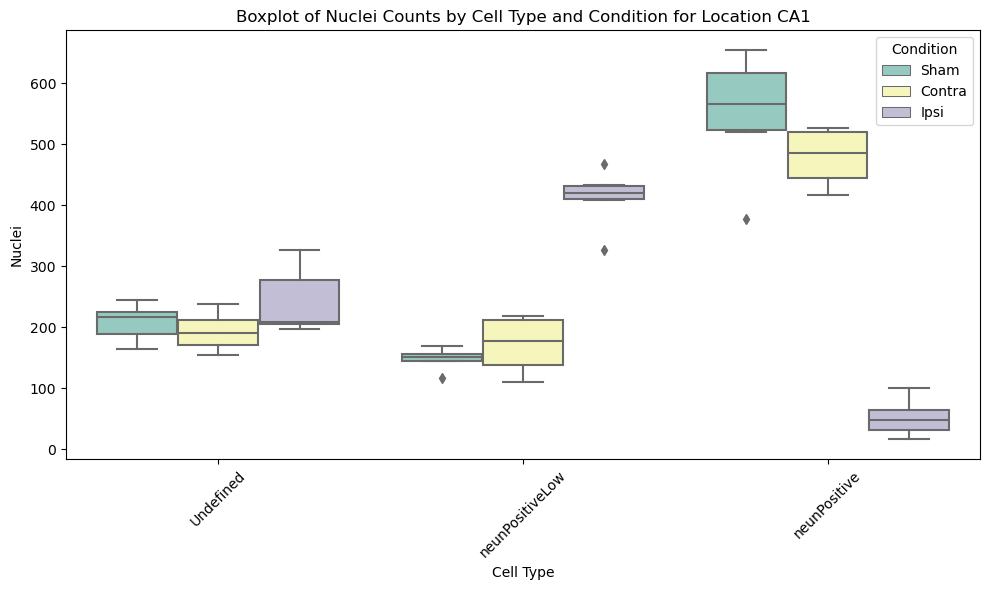

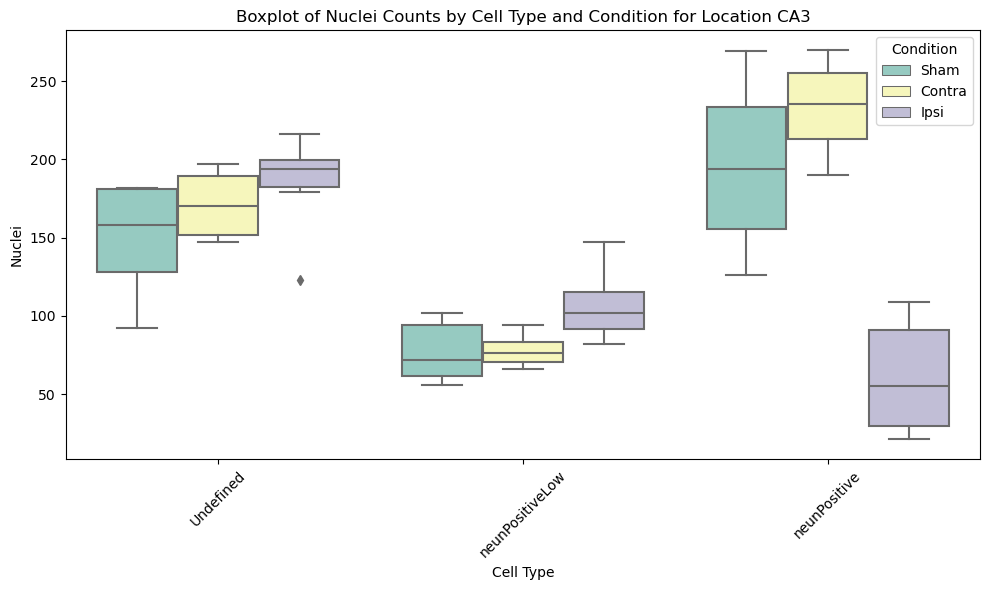

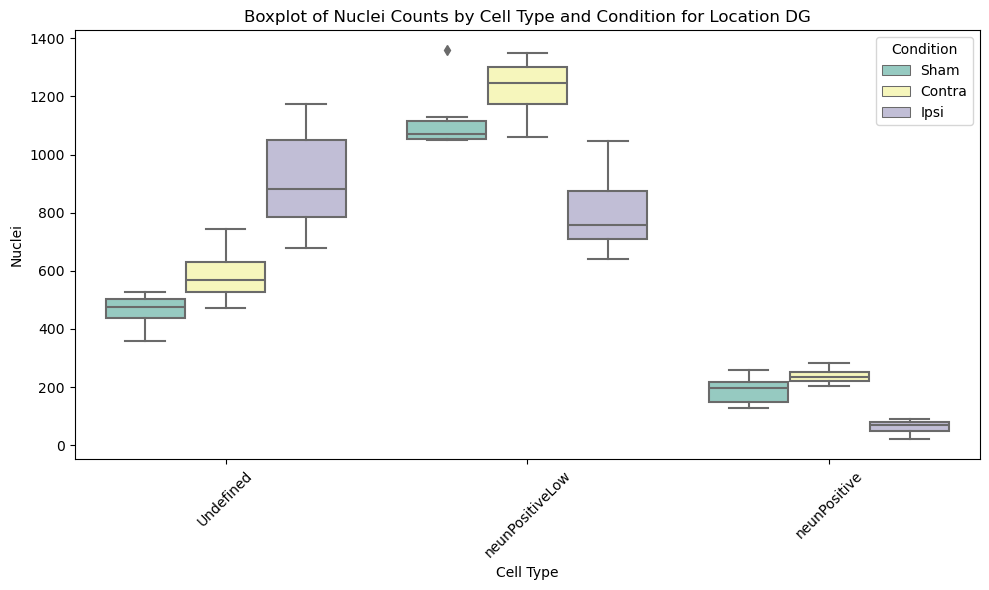

In [6]:
locations = neuron_counts['Location'].unique()

# Loop through each location
for location in locations:
    # Filter dataframe for the current location
    subset_df = neuron_counts[neuron_counts['Location'] == location]
    x_order = ['Undefined', 'neunPositiveLow', 'neunPositive']
    hue_order = ['Sham', 'Contra', 'Ipsi']
    
    # Create the boxplot
    plt.figure(figsize=(10, 6))  # Adjust size if needed
    sns.boxplot(data=subset_df, x='CellType', y='Nuclei', hue='Condition', hue_order=hue_order, order=x_order, palette='Set3')
    
    # Set labels and title
    plt.xlabel('Cell Type')
    plt.ylabel('Nuclei')
    plt.title(f'Boxplot of Nuclei Counts by Cell Type and Condition for Location {location}')
    
    # Rotate x-axis labels for better visibility if needed
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.legend(title='Condition')  # Add legend title
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [7]:
image_df = pd.read_csv('csv/images.csv')
merged_df = pd.merge(neuron_counts, image_df, on='ImageName')

# Calculate neuron density for each region
merged_df['NeuronDensity'] = merged_df['Nuclei']  # Initialize the column with Nuclei counts
merged_df.loc[merged_df['Location'] == 'CA1', 'NeuronDensity'] /= merged_df['CA1Volume']  # Divide by CA1Volume where Location is CA1
merged_df.loc[merged_df['Location'] == 'CA3', 'NeuronDensity'] /= merged_df['CA3Volume']  # Divide by CA3Volume where Location is CA3
merged_df.loc[merged_df['Location'] == 'DG', 'NeuronDensity'] /= merged_df['DGVolume']    # Divide by DGVolume where Location is DG
merged_df['NeuronDensity'] *= 10**6
# If you want to round the density to a specific number of decimal places
# merged_df['NeuronDensity'] = merged_df['NeuronDensity'].round(decimals=2)

# Display the resulting dataframe
print(merged_df)


    Location Condition_x                                          ImageName         CellType  Nuclei Condition_y     CA1Volume     CA3Volume      DGVolume  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  NeuronDensity
0        CA1      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...        Undefined     155      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     150.192204
1        CA1      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...     neunPositive     417      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     404.065477
2        CA1      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...  neunPositiveLow     218      Contra  1.032011e+06  1.015914e+06  1.194303e+06     12.385466      3.033560     24.824529      6.124181     211.238067
3        CA3      Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...        Undefined    

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\1326208993.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.50192204e-04 4.04065477e-04 2.11238067e-04 2.04082250e-04
 4.53182644e-04 1.10044351e-04 1.90628987e-04 4.14097421e-04
 1.67401085e-04 1.43990711e-04 4.31154003e-04 1.20264969e-04
 3.33032030e-04 5.00569616e-05 4.36210665e-04 2.12612989e-04
 4.77082805e-05 3.38106510e-04 2.15636302e-04 7.66220362e-05
 5.11178441e-04 2.22029361e-04 1.07296485e-04 4.40871697e-04
 2.43373745e-04 1.88114972e-05 5.09086144e-04 2.91546393e-04
 2.52673541e-05 3.97474916e-04 1.15271021e-04 3.20082924e-04
 6.02085244e-05 1.54355759e-04 4.47358504e-04 1.16108314e-04
 1.38557893e-04 4.02045033e-04 1.18872072e-04 1.31595569e-04
 4.81447205e-04 1.15547329e-04 1.58549508e-04 3.92598782e-04
 1.18534632e-04 2.05485849e-04 3.18334636e-04 1.22112492e-04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype 

In [8]:
#print(merged_df[(merged_df['CellType'] != 'Undefined') & (merged_df['Location'] == 'DG')])

table_df = merged_df.groupby(['Location', 'Condition_x', 'CellType']).agg({
    'NeuronDensity': ['mean', 'std']
})
print(table_df)

                                     NeuronDensity            
                                              mean         std
Location Condition_x CellType                                 
CA1      Contra      Undefined          172.223538   29.643495
                     neunPositive       425.624886   21.507299
                     neunPositiveLow    152.237118   46.595800
         Ipsi        Undefined          253.038470   48.928403
                     neunPositive        54.293769   33.077736
                     neunPositiveLow    438.821396   66.387824
         Sham        Undefined          150.635933   31.125766
                     neunPositive       393.644514   65.953094
                     neunPositiveLow    108.563894   23.804063
CA3      Contra      Undefined          190.812596   14.530390
                     neunPositive       259.761818   23.870462
                     neunPositiveLow     87.928953   15.871048
         Ipsi        Undefined          280.244577   59

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\2982134237.py:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  stripplot = sns.stripplot(data=subset_df, x='CellType', y='NeuronDensity',order = x_order, hue='Condition_x', hue_order=hue_order, dodge=True, palette=palette, alpha=0.7)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


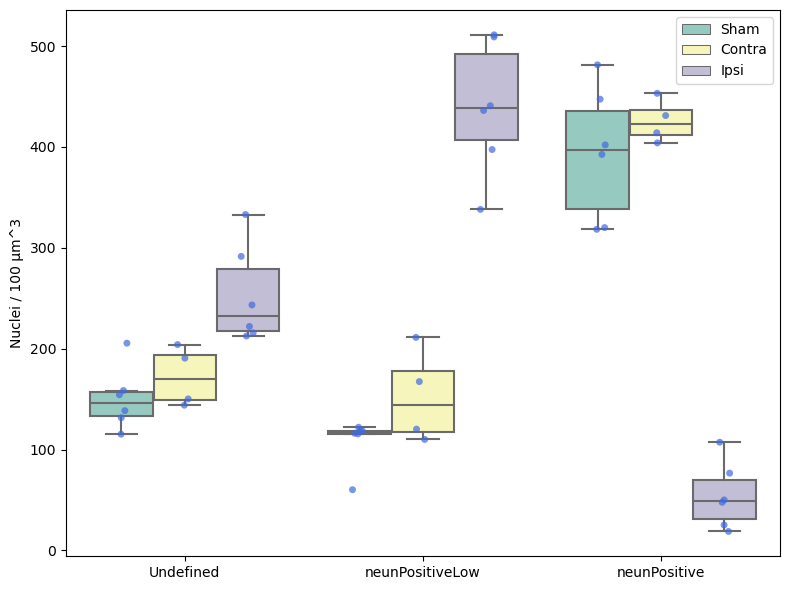

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\2982134237.py:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  stripplot = sns.stripplot(data=subset_df, x='CellType', y='NeuronDensity',order = x_order, hue='Condition_x', hue_order=hue_order, dodge=True, palette=palette, alpha=0.7)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


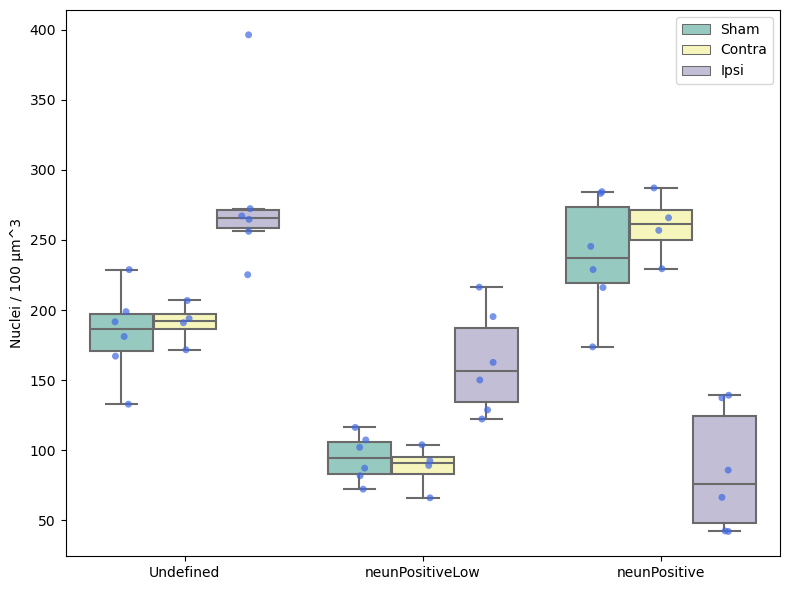

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\2982134237.py:11: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  stripplot = sns.stripplot(data=subset_df, x='CellType', y='NeuronDensity',order = x_order, hue='Condition_x', hue_order=hue_order, dodge=True, palette=palette, alpha=0.7)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


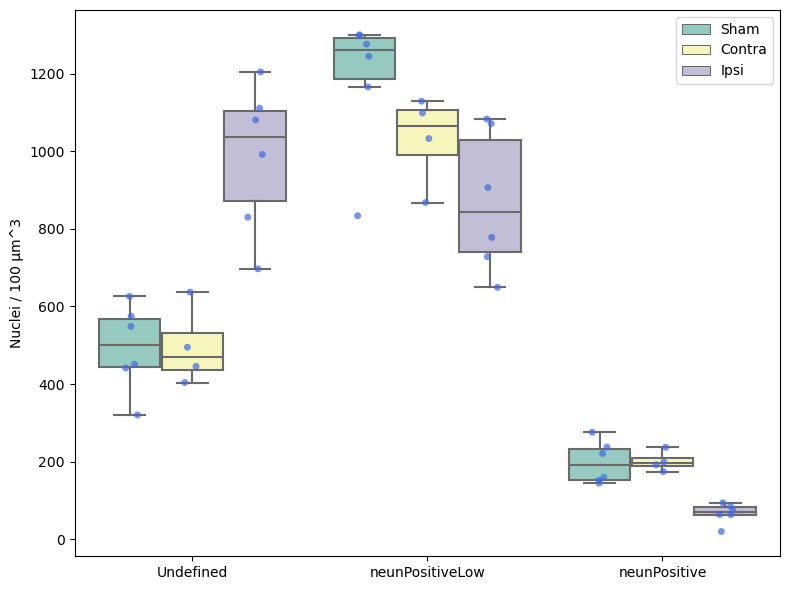

In [9]:
palette = sns.color_palette(['royalblue'], 2)
for location in locations:
    # Filter dataframe for the current location
    subset_df = merged_df[merged_df['Location'] == location]
    x_order = ['Undefined', 'neunPositiveLow', 'neunPositive']
    hue_order = ['Sham', 'Contra', 'Ipsi']
    
    # Create the boxplot
    plt.figure(figsize=(8, 6))  # Adjust size if needed
    boxplot = sns.boxplot(data=subset_df, x='CellType', y='NeuronDensity', showfliers=False, hue='Condition_x', hue_order=hue_order, order=x_order, palette='Set3')
    stripplot = sns.stripplot(data=subset_df, x='CellType', y='NeuronDensity',order = x_order, hue='Condition_x', hue_order=hue_order, dodge=True, palette=palette, alpha=0.7)
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Nuclei / 100 \u03bcm^3')
    #plt.title(location)
    
    # Rotate x-axis labels for better visibility if needed
    #plt.xticks(rotation=45)
    
    handles, labels = boxplot.get_legend_handles_labels()

    # Create custom legend
    plt.legend(handles=handles[:3], labels=labels[:3])
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    name = f"plots/{location}_neurons_volume_v2.pdf"
    #plt.savefig(name)
    plt.show()

                                            ImageName Condition         CellType  Ch1Intensity
0   HI 1 Contralateral Mouse 8 Slide18 G4green Neu...    Contra        Undefined      3.101059
1   HI 1 Contralateral Mouse 8 Slide18 G4green Neu...    Contra     neunPositive     72.973256
2   HI 1 Contralateral Mouse 8 Slide18 G4green Neu...    Contra  neunPositiveLow     33.179566
3   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi        Undefined      3.739468
4   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi     neunPositive     59.677222
5   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi  neunPositiveLow     28.172662
6   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi        Undefined      2.674109
7   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi     neunPositive     50.635496
8   HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...      Ipsi  neunPositiveLow     22.342927
9   HI 2 Contralateral Mouse 9 Slide17 G4green Neu

C:\Users\jonasvg\AppData\Local\Temp\ipykernel_7044\78154781.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=grouped_df, x= 'CellType', y='Ch1Intensity', hue='Condition', hue_order=hue_order, order=x_order, dodge=True, palette=palette, alpha=0.7)
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


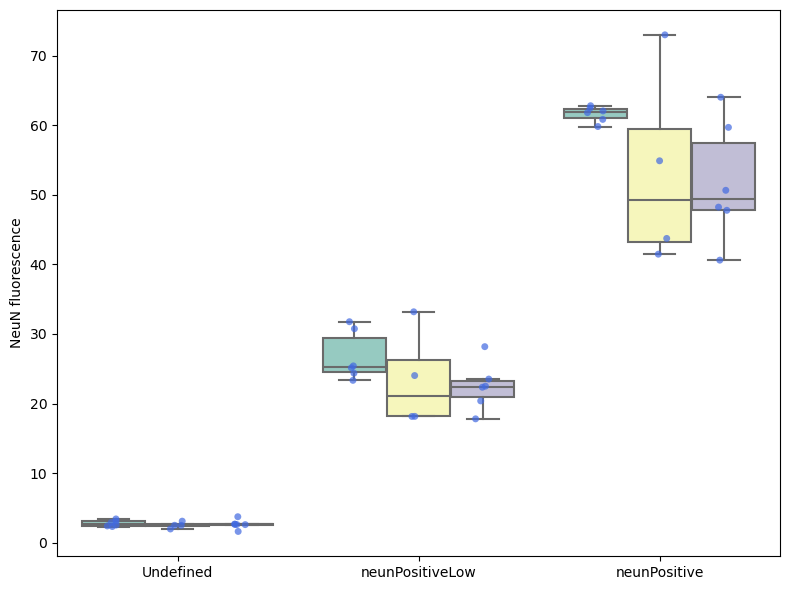

In [10]:
grouped_df = nucleus_df.groupby(['ImageName', 'Condition', 'CellType'])['Ch1Intensity'].median().reset_index()
print(grouped_df)

plt.figure(figsize=(8, 6))
sns.boxplot(data=grouped_df, x= 'CellType', y='Ch1Intensity', hue='Condition',showfliers=False, hue_order=hue_order, order=x_order, palette='Set3')
sns.stripplot(data=grouped_df, x= 'CellType', y='Ch1Intensity', hue='Condition', hue_order=hue_order, order=x_order, dodge=True, palette=palette, alpha=0.7)
plt.xlabel('')
plt.ylabel('NeuN fluorescence')
plt.legend().set_visible(False)
plt.tight_layout()
#plt.savefig('plots/neuN_median_clusters.pdf')
plt.show()


In [11]:
img_name = 'Sham 1 Contralateral Mouse 6 Slide15 G4green NeuNpink CD86red 40x 5x4 technical replica 2.lsm' # 'Enter name of image as it appears in nucleus_df'
img_path = 'D:/Users\Jonas/nuclei\imagesAndMasks\images_sham\Sham 1 Contralateral Mouse 6 Slide15 G4green NeuNpink CD86red 40x 5x4 technical replica 2.lsm' # 'Path to same image'

neu_df = nucleus_df[nucleus_df['CellType'] == 'neunPositive']
neuLow_df = nucleus_df[nucleus_df['CellType'] == 'neunPositiveLow']
undef_df = nucleus_df[nucleus_df['CellType'] == 'Undefined']
img_neu_df = neu_df[neu_df['ImageName'] == img_name]
img_neuLow_df = neuLow_df[neuLow_df['ImageName'] == img_name]
img_undef_df = undef_df[undef_df['ImageName'] == img_name]

centroids_neu = img_neu_df['Centroid'].apply(eval)
centroids_neuLow = img_neuLow_df['Centroid'].apply(eval)
centroids_undef = img_undef_df['Centroid'].apply(eval)

# Convert centroids to a NumPy array
centroids_neu_array = np.array(centroids_neu.tolist())  # Transpose the array to get the desired shape
centroids_neuLow_array = np.array(centroids_neuLow.tolist())
centroids_undef_array = np.array(centroids_undef.tolist())

from skimage import io
import napari
img= readImage(img_path)

viewer = napari.view_image(img, scale =([0.9278, 0.3459, 0.3459]), channel_axis=3 )
viewer.add_points(centroids_neu_array, size=10, symbol='cross', edge_color='blue', face_color='blue', name='NeuN positive', scale=([0.9278, 0.3459, 0.3459]))
viewer.add_points(centroids_neuLow_array, size=10, symbol='cross', edge_color='green', face_color='green', name='NeuN Low', scale=([0.9278, 0.3459, 0.3459]))
viewer.add_points(centroids_undef_array, size=10, symbol='cross', edge_color='yellow', face_color='yellow', name='NeuN negative', scale=([0.9278, 0.3459, 0.3459]))
napari.run()

In [16]:
from scipy.stats import f_oneway
from scipy.stats import friedmanchisquare

anova_results = {}
tukey_results = {}

for region in merged_df['Location'].unique():
    for cell_type in merged_df['CellType'].unique():
        type_data = [merged_df[(merged_df['CellType'] == cell_type) & (merged_df['Condition_x'] == condition) & (merged_df['Location'] == region)]['NeuronDensity'] for condition in merged_df['Condition_x'].unique()]
        anova_results[cell_type] = f_oneway(*type_data)
        
        print(f"ANOVA results for {cell_type} in {region}: {anova_results[cell_type]}")
        
        # Perform Tukey's HSD test for each class of neuron
        mc = MultiComparison(merged_df[(merged_df['CellType'] == cell_type) & (merged_df['Location'] == region)]['NeuronDensity'], merged_df[(merged_df['CellType'] == cell_type) & (merged_df['Location'] == region)]['Condition_x'])
        tukey_results[cell_type] = mc.tukeyhsd()
        print(f"Tukey's HSD results for {cell_type} in {region}:\n{tukey_results[cell_type]}")



ANOVA results for Undefined in CA1: F_onewayResult(statistic=11.392331137647563, pvalue=0.0013854848830947592)
Tukey's HSD results for Undefined in CA1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
Contra   Ipsi   80.8149 0.0167   14.8883 146.7415   True
Contra   Sham  -21.5876  0.671  -87.5142   44.339  False
  Ipsi   Sham -102.4025 0.0014 -161.3691  -43.436   True
--------------------------------------------------------
ANOVA results for neunPositive in CA1: F_onewayResult(statistic=106.21602953806196, pvalue=8.831406674659435e-09)
Tukey's HSD results for neunPositive in CA1:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
Contra   Ipsi -371.3311    0.0 -451.2847 -291.3775   True
Contra   Sham  -31.9804 0.5564  -111.934   47.9732  False

In [ ]:
undefined_df = nucleus_df[(nucleus_df['CellType'] == 'Undefined')]
print(undefined_df)

In [ ]:
non_neuron_counts = undefined_df.groupby(['Condition', 'ImageName']).size().reset_index(name='NonNuclei')
print(non_neuron_counts)

In [ ]:
x_order = ['Sham', 'Contra', 'Ipsi']
plt.figure(figsize=(8, 6))  # Adjust size if needed
sns.boxplot(data=non_neuron_counts, x='Condition', y='NonNuclei', order=x_order, palette='Set3')
#plt.savefig("plots/nonNeuronsWholeImage.pdf")
plt.show()

In [ ]:
sham_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Sham']['NonNuclei']
contra_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Contra']['NonNuclei']
ipsi_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Ipsi']['NonNuclei']

# Perform ANOVA
f_statistic, p_value = f_oneway(sham_data, contra_data, ipsi_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

In [ ]:
undefined_df2 = undefined_df[undefined_df['Location'] != 'Undefined']

non_neuron_counts = undefined_df2.groupby(['Condition', 'ImageName']).size().reset_index(name='NonNeurons')
print(non_neuron_counts)

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust size if needed
sns.boxplot(data=non_neuron_counts, x='Condition', y='NonNeurons', order=x_order, palette='Set3')
#plt.savefig("plots/nonNeuronsInROIS.pdf")
plt.show()

In [1]:
sham_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Sham']['NonNuclei']
contra_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Contra']['NonNuclei']
ipsi_data = non_neuron_counts[non_neuron_counts['Condition'] == 'Ipsi']['NonNuclei']

# Perform ANOVA
f_statistic, p_value = f_oneway(sham_data, contra_data, ipsi_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

NameError: name 'non_neuron_counts' is not defined